In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 17s 2us/step


In [2]:
X_train.shape

#This shows that the training dataset contains 60,000 images where each is 28x28 pixel greyscale image.

Y_train.shape

X_test.shape

#The training dataset contains 10,000 images where each is 28x28 pixel greyscale image.

(10000, 28, 28)

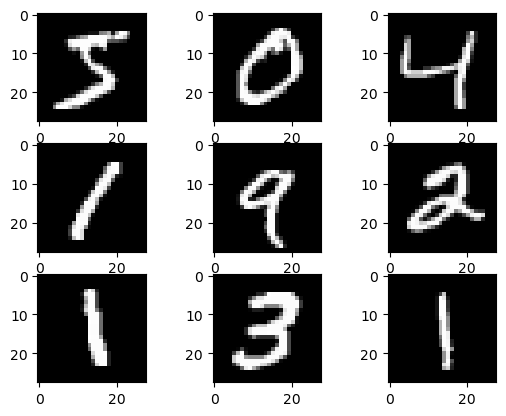

In [3]:
X_train[0]

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

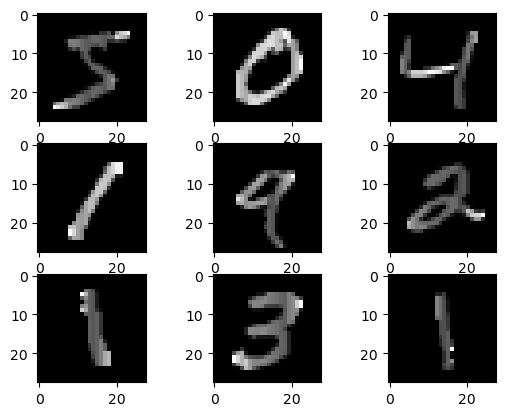

In [5]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

#Visualising the data after normalization
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


In [7]:
model = model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1825 - accuracy: 0.9431
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0721 - accuracy: 0.9768
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0545 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0438 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0362 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0322 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0283 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0262 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0230 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - l

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 48)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
pip install pydot

  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/7f/90/c9b51f3cdff89cd8f93382060330f43d1af098a6624cff439e700791e922/pydot-2.0.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 519.8 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

313/313 [==============================] - 1s 3ms/step - loss: 71.5696 - accuracy: 0.9375
Validation loss :  7156.9580078125 %
Validation accuracy :  93.75 %


In [19]:
model.save('mnist_model')


INFO:tensorflow:Assets written to: mnist_model/assets


INFO:tensorflow:Assets written to: mnist_model/assets


In [20]:
model.save('/Users/shaikayesha/Downloads/img_files/mnist_model')


INFO:tensorflow:Assets written to: /Users/shaikayesha/Downloads/img_files/mnist_model/assets


INFO:tensorflow:Assets written to: /Users/shaikayesha/Downloads/img_files/mnist_model/assets


313/313 [==============================] - 1s 3ms/step


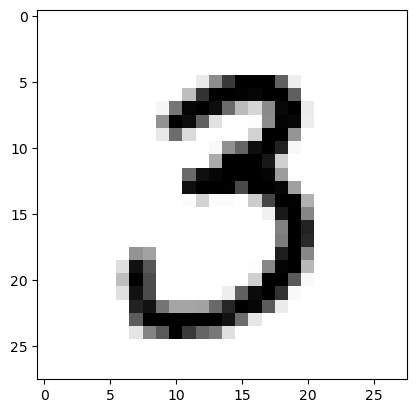

The prediction is: 3


In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
new_model = tf.keras.models.load_model("mnist_model")  # Assuming mnist_model is saved in the current directory

# Assuming you have loaded the X_test data
predictions = new_model.predict(X_test)

# Visualize a sample from the test data along with its predicted label
sample_index = 90  # Change this to the index of the sample you want to visualize
plt.imshow(X_test[sample_index], cmap=plt.get_cmap('binary'))
plt.show()

print("The prediction is:", np.argmax(predictions[sample_index]))

